<a href="https://colab.research.google.com/github/Bxvam/PrimerDepartamental/blob/main/2dep3Act.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Paso 1: Sube tu archivo de audio (.wav o .mp3):


Saving WhatsApp Ptt 2026-01-19 at 13.00.07.ogg to WhatsApp Ptt 2026-01-19 at 13.00.07 (1).ogg

Procesando: WhatsApp Ptt 2026-01-19 at 13.00.07 (1).ogg ...

>>>  ENTROPÍA CALCULADA: 6.0575 bits
------------------------------


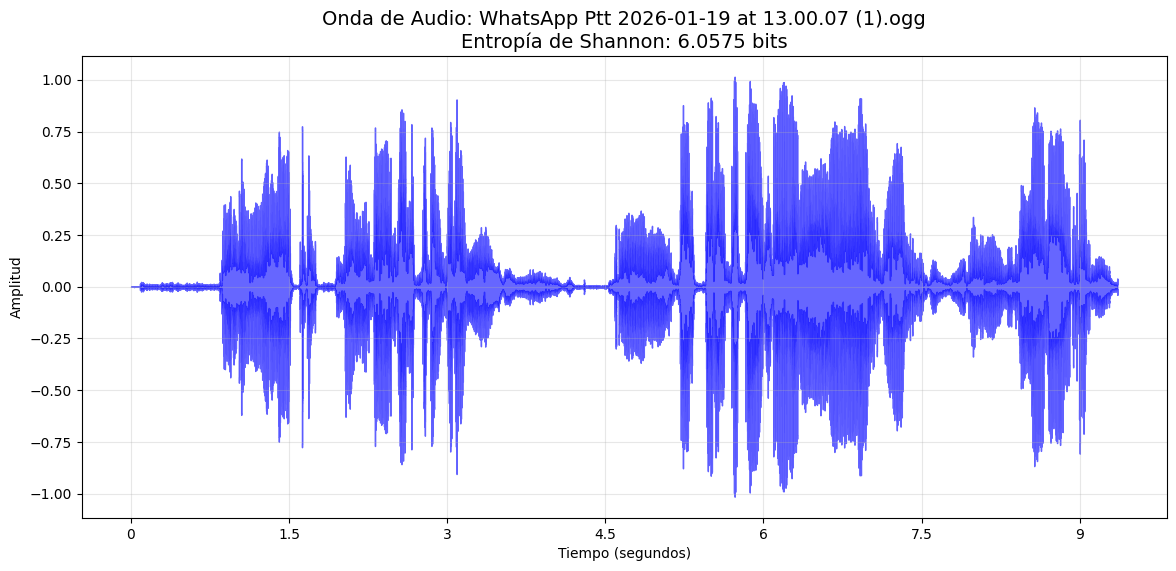

Reproducir audio original:


In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import IPython.display as ipd

print("Paso 1: Sube tu archivo de audio (.wav o .mp3):")
uploaded = files.upload()
# Verificamos que se haya subido algo para evitar errores
if uploaded:
    nombre_archivo = list(uploaded.keys())[0]
else:
    print("No subiste ningún archivo.")
    nombre_archivo = None

def visualizar_onda_con_entropia(ruta_audio):
    if not ruta_audio: return

    print(f"\nProcesando: {ruta_audio} ...")

    # 1. Cargamos el audio
    # y = La serie de tiempo (amplitudes)
    y, sr = librosa.load(ruta_audio)

    # --- CÁLCULO DE ENTROPÍA (Shannon) ---
    # Como el audio son números decimales (ej: 0.00423...), no podemos contar
    # cada número único (serían infinitos). Los agrupamos en "bins" (cajas).
    # Usamos 256 bins para simular una resolución estándar.

    # 'counts' nos dice cuántas veces la onda pasó por cierto nivel de volumen
    counts, _ = np.histogram(y, bins=256)

    # Calculamos la probabilidad (p)
    probabilidades = counts / len(y)

    # Filtramos los ceros (porque log2(0) da error matemático)
    probabilidades = probabilidades[probabilidades > 0]

    # Aplicamos la fórmula: - sum(p * log2(p))
    entropia = -np.sum(probabilidades * np.log2(probabilidades))
    # -------------------------------------

    # 2. Configuración de la gráfica
    plt.figure(figsize=(14, 6))

    # 3. Dibujamos la onda
    librosa.display.waveshow(y, sr=sr, color="blue", alpha=0.6)

    # 4. Etiquetas e Información
    plt.title(f"Onda de Audio: {ruta_audio}\nEntropía de Shannon: {entropia:.4f} bits", fontsize=14)
    plt.xlabel("Tiempo (segundos)")
    plt.ylabel("Amplitud")
    plt.grid(True, alpha=0.3)

    # Mostramos el valor también en la consola
    print(f"\n>>>  ENTROPÍA CALCULADA: {entropia:.4f} bits")
    print("-" * 30)

    plt.show()

    # Extra: Reproductor
    print("Reproducir audio original:")
    ipd.display(ipd.Audio(ruta_audio))

# Ejecutamos la función
if nombre_archivo:
    visualizar_onda_con_entropia(nombre_archivo)